# Dataset and Dataloader
pytorch 提供內建的dataloder可以作為使用，它可以讓你預先載入datasets(自定義的)

## 常見的data類型
* Image Datasets
* Text Datasets
* Audio Datasets

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

In [2]:

training_data = datasets.FashionMNIST(
    root='../data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='../data',
    train=False,
    download=True,
    transform=ToTensor()
)

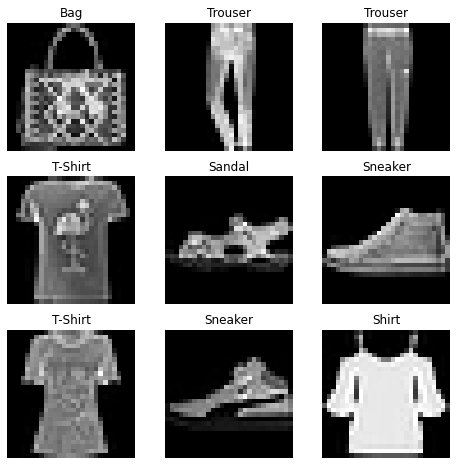

In [7]:
from matplotlib.figure import Figure


labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure : Figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size = (1, )).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Dataloader

In [9]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64,shuffle=True)

Feature Batch Shape = torch.Size([64, 1, 28, 28])
Label Batch Shape = torch.Size([64])


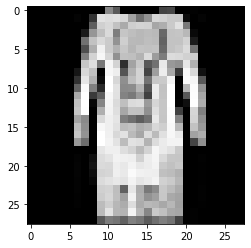

Label = Shirt


In [10]:
train_features, train_label = next(iter(train_dataloader))
print(f'Feature Batch Shape = {train_features.size()}')
print(f'Label Batch Shape = {train_label.size()}')
img = train_features[0].squeeze()
lable = train_label[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f"Label = {labels_map[label]}")

# Normalization

正規化是一個常見的資料前處理過程技術，在影像處理中通常叫做scale或transform，而目的是為了確保在學習過程中學習參數矩陣中能學到相同大小的貢獻

比如在影像處理中如果為灰階圖其值的範圍為0~255 如果有一個pixel值為17，另一個pixel值197，那麼因為範圍太大就很有可能學習過程中模型的輸出分布就越可能偏離資料分布

正規化其目的是為了避免以下幾點
* 準確度降低
* 模型難以學習
* 特徵資料的不當分布

# Transforms

In [6]:
ds = datasets.FashionMNIST(
    root='../data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [7]:
ds.target_transform

Lambda()